In [2]:
import numpy as np
import pandas as pd
import scipy.stats
import re

In [3]:
path = "dataset.csv"
criteria = "doctor_name"
source_df = pd.read_csv(path, engine="python", delimiter=",")

source_df["price"] = source_df["price"].apply(lambda d: float(re.sub(r'[^0-9-,]', "", d).replace(",", ".")))

source_df.head(len(source_df))


,price,datetime,doctor_name,patient_name,operation,direction
0,10880.0,8/7/2021 12:58,Афанасьева Ю. Е.,Борискина Ю. Д.,№42373 (21;25) Афанасьева Ю. Е. - Белозерова М...,ТЕР
1,0.0,8/5/2021 19:40,Афанасьева Ю. Е.,Субботина Е. С.,NaN,NaN
2,8430.0,8/5/2021 18:15,Афанасьева Ю. Е.,Кулакова Н. А.,№42276 (23) Афанасьева Ю. Е. - Тихов Г. С. - С...,NaN
3,10240.0,8/5/2021 16:36,Афанасьева Ю. Е.,Губанова Ю. С.,№42272 (24;25) Афанасьева Ю. Е. - Тихов Г. С. ...,NaN
4,5580.0,7/31/2021 13:42,Афанасьева Ю. Е.,Попова Е. В.,№41953 (37) Афанасьева Ю. Е. - Кривомазова М. ...,ТЕР
...,...,...,...,...,...,...
6183,0.0,8/4/2021 15:25,Хмелева А. В.,Тихонова Н. А.,NaN,NaN
6184,0.0,8/3/2021 20:05,Хмелева А. В.,Александрова Н. И.,NaN,NaN
6185,3190.0,8/3/2021 18:33,Хмелева А. В.,Шубовская В. Ю.,№42153 (21) Хмелева А. В. - Алексеева Н. А. (О...,ОРТ
6186,3550.0,8/3/2021 16:42,Хмелева А. В.,Тодоров Д.,№42147 (в.ч.;н.ч.) Хмелева А. В. - Алексеева Н...,NaN


Columns:
1. ID - Identifier of the candidate
2. incomde - The annual price declared by the person
3. age - Age of the person at the moment of the test
4. gender - Gender declared by the person
5. education_level - Education level declared by the user (0: primary complete, 1: secondary complete, 2: tertiary complete, 3: post


In [4]:
def mean_amount_by_doc(df):
    df_doc = df.groupby(criteria, as_index=False).agg({"price": "mean"})
    df_doc = df_doc.sort_values("price", ascending=False)

    return df_doc

df_doc = mean_amount_by_doc(source_df)
df_doc.head(len(df_doc))

,doctor_name,price
15,Рентген Л.,26728.387097
9,Максимова Р. З.,18400.000000
1,Баумгартен А. Е.,11224.671053
17,Романишина Г. В.,10218.777506
16,Родионцев А. А.,9482.459016
12,Обухова Е. М.,8752.229965
22,Творогова Д. В.,8579.027237
4,Визер К. А.,8422.382075
6,Ким М. Б.,8180.885417
19,Смирнова И. Л.,8098.000000


In [5]:
count_empl = len(df_doc)
price_total = df_doc["price"].sum()

print("number of doctors: {}".format(count_empl))
print("total price: {}".format(int(price_total)))

number of doctors: 26
total price: 199781


Text(0, 0.5, 'Price')

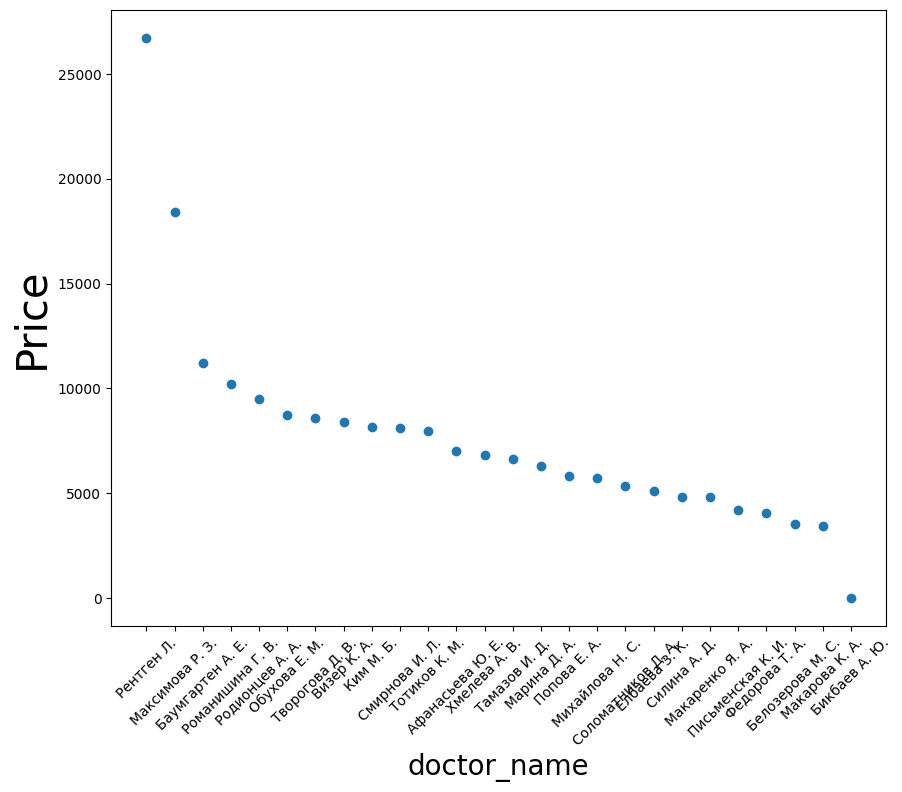

In [6]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(df_doc[criteria], df_doc["price"])
plt.xticks(rotation=45)

plt.xlabel(criteria, fontsize=20)
plt.ylabel("Price", fontsize=30)

C:\Users\apershinov\AppData\Local\Temp\ipykernel_1692\1385791571.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_doc["price"], kde=False)


<AxesSubplot: xlabel='price'>

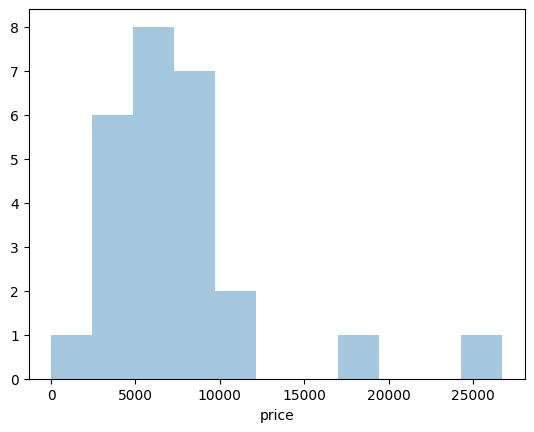

In [42]:
import seaborn as sns

sns.distplot(df_doc["price"], kde=False)

In [11]:

mean = df_doc["price"].mean()
var = df_doc["price"].var()
std = df_doc["price"].std()
median = df_doc["price"].median()

trunk_mean = scipy.stats.trim_mean(df_doc["price"], proportiontocut=0.1)

def mad(df):
    sigma = 1.2
    k = scipy.stats.lognorm.ppf(3/4., s=sigma)
    median = df.median()

    return k * np.median(np.fabs(df - median))

mad_value = mad(df_doc["price"])
print(f'Average price Size: Average = {int(mean)}, variance = {int(var)}, standard deviation = {int(std)},\n'
      f'median = {int(median)}, truncated mean {int(trunk_mean)}, MAD = {int(mad_value)}')

Average price Size: Average = 7683, variance = 26483264, standard deviation = 5146,
median = 6741, truncated mean 6874, MAD = 4200


In [43]:
norm_q95 = scipy.stats.norm.ppf(0.95)
mean_conf = norm_q95 * std / np.sqrt(len(df_doc))

chi2_q95_left = scipy.stats.chi2.ppf((1 - 0.05 / 2.0), df=len(df_doc) - 1)
chi2_q95_right = scipy.stats.chi2.ppf(0.05 / 2.0, df=len(df_doc) - 1)

var_conf_left = var * (len(df_doc) - 1) / chi2_q95_left
var_conf_right = var * (len(df_doc) - 1) / chi2_q95_right

std_conf_left = np.sqrt(var_conf_left)
std_conf_right = np.sqrt(var_conf_right)

print("Sample mean: %0.3f +/- %0.3f" % (mean, mean_conf))
print("95%% Confidence interval of sample variance : (%0.3f; %0.3f)"
      % (var_conf_left, var_conf_right))
print("95%% Confidence interval of sample standard deviation: (%0.3f; %0.3f)"
      % (std_conf_left, std_conf_right))

Sample mean: 7683.917 +/- 1660.070
95% Confidence interval of sample variance : (16288785.520; 50464614.824)
95% Confidence interval of sample standard deviation: (4035.937; 7103.845)


C:\Users\apershinov\AppData\Local\Temp\ipykernel_1692\4265654785.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_doc["price"], kde=False, norm_hist=True, label="Average price size in roubles")


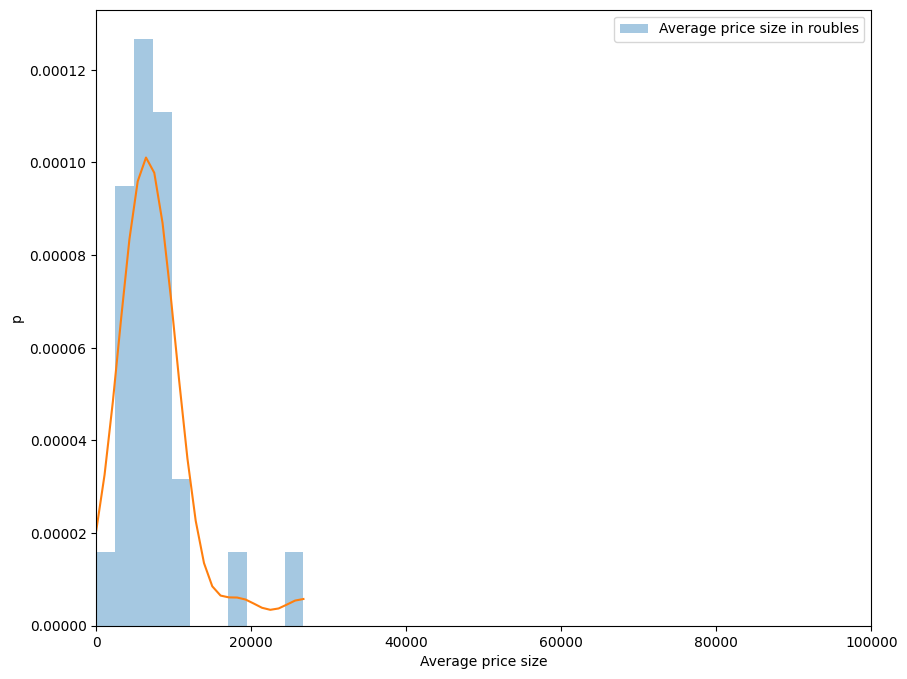

In [58]:
plt.figure(figsize=(10, 8))

kernel = scipy.stats.gaussian_kde(df_doc["price"])

min_price, max_price = df_doc["price"].min(), df_doc["price"].max()
x = np.linspace(min_price, max_price, len(df_doc))
kde_values = kernel.evaluate(x)

sns.distplot(df_doc["price"], kde=False, norm_hist=True, label="Average price size in roubles")
plt.plot(x, kde_values)

plt.ylabel("p")
plt.xlabel("Average price size")
plt.xlim(0, 10e4)
plt.legend()
plt.show()
